# Traffic Flow Prediction using Machine Learning

- We import 'pandas', 'numpy' and 'matplotlib' libraries for loading and working with the dataframe, for conducting mathematical operations and for 2 dimensional data visualization, respectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- We load the dataset on to the dataframe using pandas library's read_csv method.
- The dataset has been taken from 'kaggle.com'.

In [2]:
df = pd.read_csv("traffic.csv")
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [3]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


- We import the 'Seaborn' library for some other functions of data visualization that are not provided by matplotlib, such as, correlation heatmap and boxplot.

In [4]:
import seaborn as sns

E:\Anaconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
print(df.dtypes)

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object


In [6]:
df['DateTime'] = df['DateTime'].astype('datetime64[ns]')

In [7]:
df.dtypes

DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
ID                   int64
dtype: object

- We split the DateTime into Year, Month, Day, Hour and Minute.

In [8]:
df['Year'] = pd.DatetimeIndex(df['DateTime']).year
df['Month'] = pd.DatetimeIndex(df['DateTime']).month
df['Day'] = pd.DatetimeIndex(df['DateTime']).day
df['Hour'] = pd.DatetimeIndex(df['DateTime']).hour
df['Minute'] = pd.DatetimeIndex(df['DateTime']).minute

In [9]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Day,Hour,Minute
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,0
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,0
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,0
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,0
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,0


- Since all the values of the minute column amount to zero, we drop it.
- Since the ID column is no more useful to us, we drop it

In [10]:
df.drop(['ID', 'Minute'], axis=1, inplace=True)

In [11]:
df.dtypes

DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
Year                 int64
Month                int64
Day                  int64
Hour                 int64
dtype: object

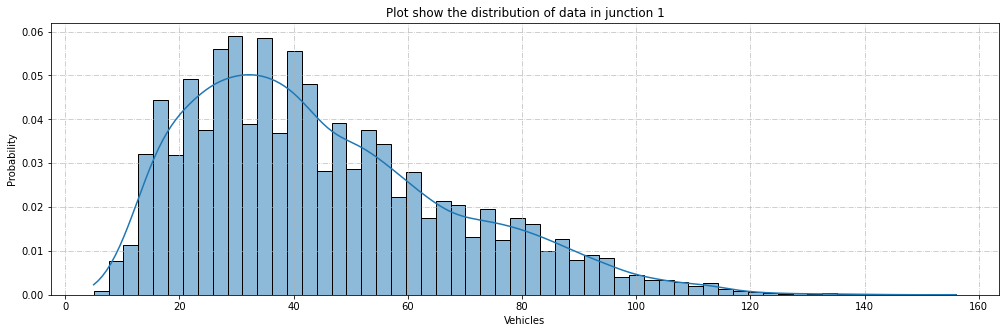

In [12]:
data = df[df['Junction'] == 1]
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
ax.set_title(f'Plot show the distribution of data in junction 1')
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

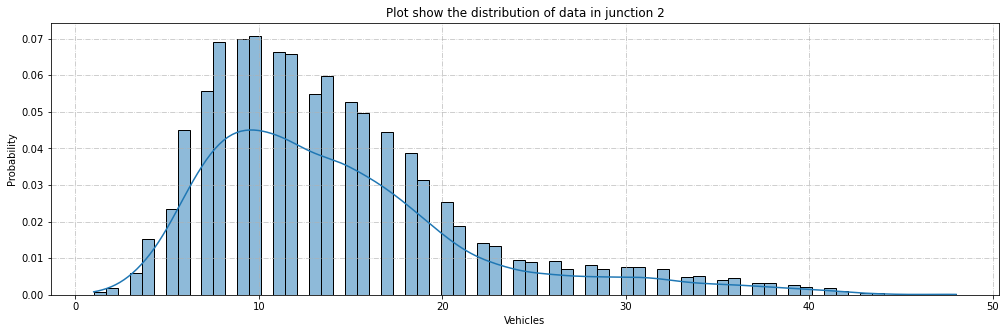

In [13]:
data = df[df['Junction'] == 2]
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
ax.set_title(f'Plot show the distribution of data in junction 2')
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

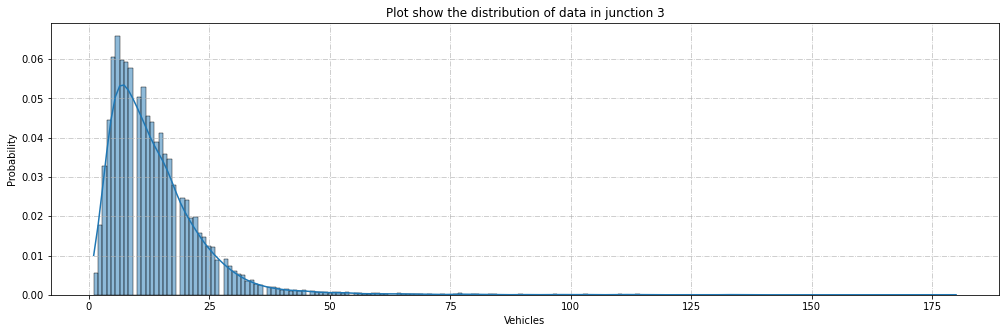

In [14]:
data = df[df['Junction'] == 3]
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
ax.set_title(f'Plot show the distribution of data in junction 3')
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

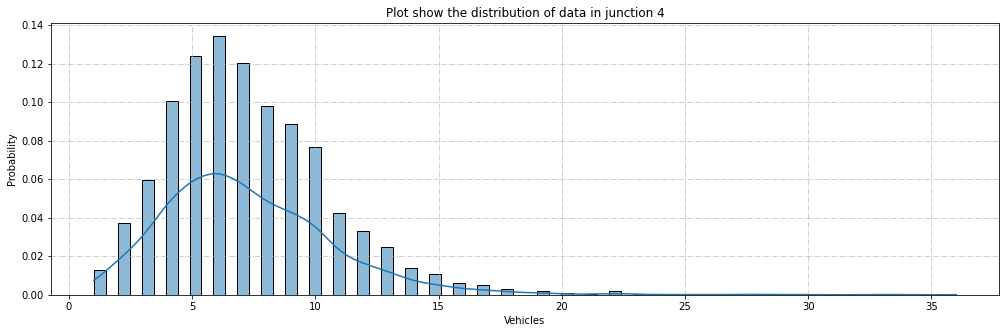

In [15]:
data = df[df['Junction'] == 4]
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
ax.set_title(f'Plot show the distribution of data in junction 4')
ax.grid(True, ls='-.', alpha=0.75)
plt.show()

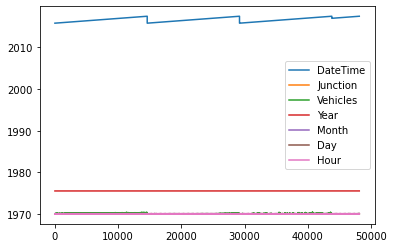

In [16]:
df.plot()
plt.show()

- We make the time series plot to visualize how the number of vehicles at a particular junction has varied over the DateTime metric which shows the timeline from the starting of the year 2015 to the end of the year 2017.

In [17]:
def make_time_series_plot(junction=1):
    f, ax = plt.subplots(figsize=(17, 5))
    data=df[df.Junction == junction]
    ax = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax)
    ax.set_title(f'Plot showing the amount of Vehicles in junction {junction} from 01-2015 to 12-2017')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

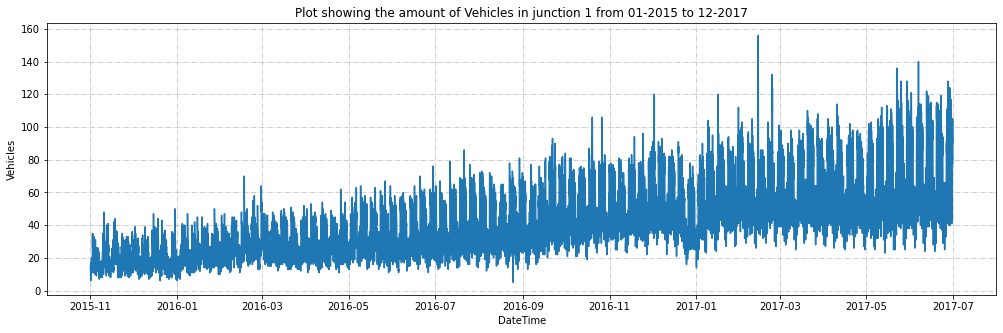

In [18]:
make_time_series_plot(1)

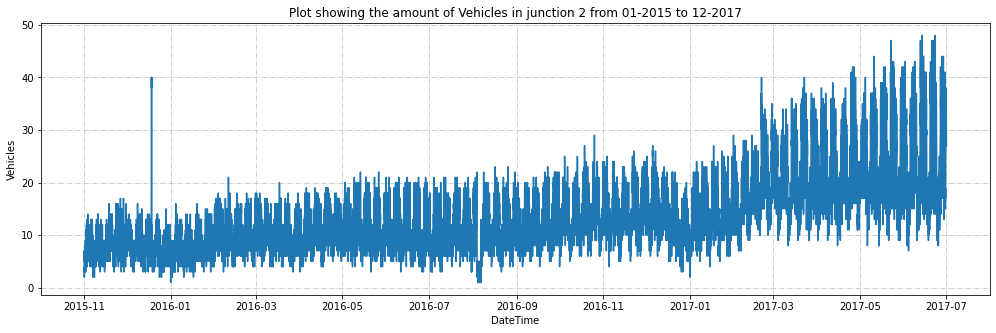

In [19]:
make_time_series_plot(2)

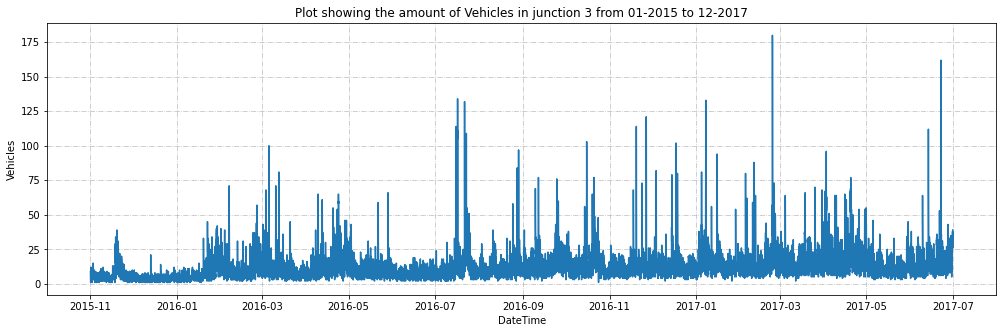

In [20]:
make_time_series_plot(3)

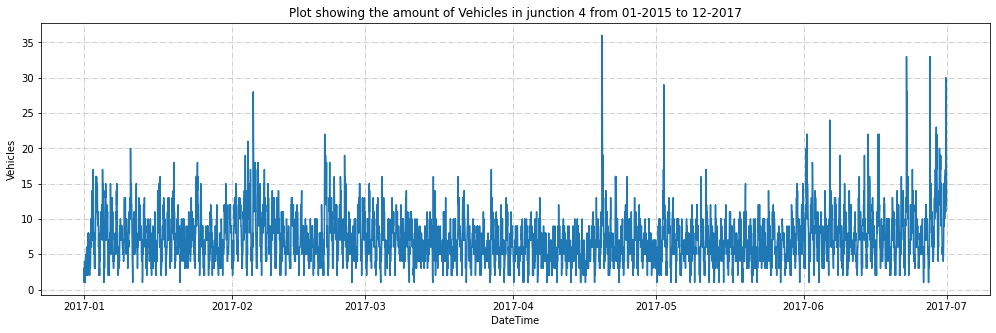

In [21]:
make_time_series_plot(4)

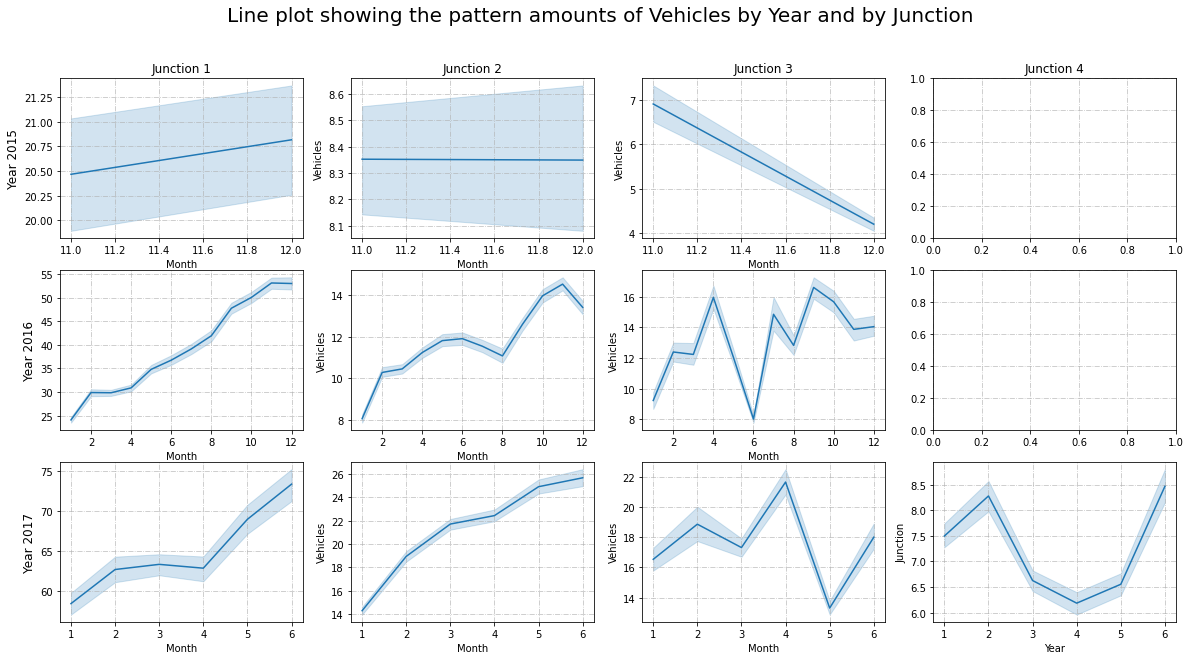

In [22]:
f, ax = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.lineplot(data=df[(df.Junction == junction) & (df.Year == year)], x='Month', y='Vehicles', ax=ax[i, j])
    ax[i, j].grid(True, alpha=0.75, ls='-.')
    
    if i == 0:
        ax[i, j].set_title(f'Junction {junction}', fontsize=12)
    if j == 0:
        ax[i, j].set_ylabel(f'Year {year}', fontsize=12)
        
plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Line plot showing the pattern amounts of Vehicles by Year and by Junction', fontsize=20)
plt.show()

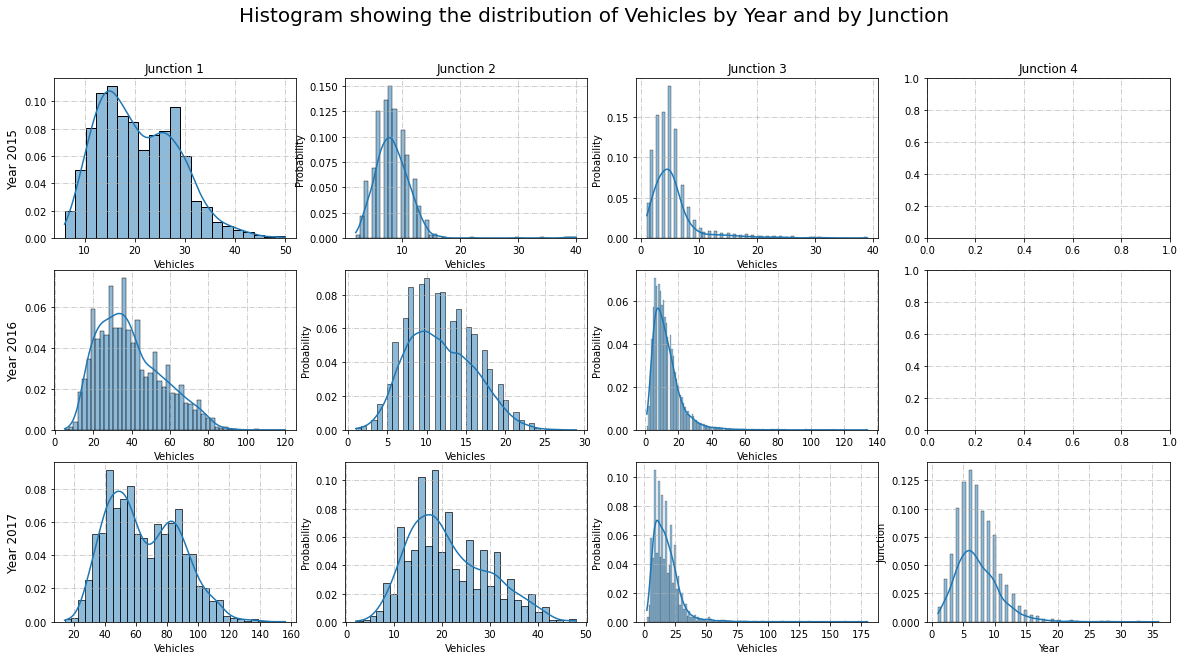

In [23]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.histplot(df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
    axis[i, j].grid(True, alpha=0.75, ls='-.')
    
    if i == 0:
        axis[i, j].set_title(f'Junction {junction}', fontsize=12)
    if j == 0:
        axis[i, j].set_ylabel(f'Year {year}', fontsize=12)

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction', fontsize=20)
plt.show()


### Scaling of the dataset
- The variables in the dataset can amount to differently affecting the target variable from what was intended.<br>
For Example - There are 24 hours in a day but only 7 days in a week. In the unscaled data, change in 5 hours would amount to a lot whereas the change in 1 day of the week would not amount as much. This leads to dissimilar effect of independent variables on target variables which would give us the wrong output.
- To solve this problem, we scaled the data. 
- The data is also scaled to normalize it so that it no longer remains skewed to one side.

In [24]:
import sklearn
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [26]:
standardization = lambda x: StandardScaler().fit_transform(x)

In [27]:
z_df = df.copy()
z_df['Vehicles'] = standardization(z_df.Vehicles.values.reshape(-1, 1))
z_df.head()

,DateTime,Junction,Vehicles,Year,Month,Day,Hour
0,2015-11-01 00:00:00,1,-0.375489,2015,11,1,0
1,2015-11-01 01:00:00,1,-0.471875,2015,11,1,1
2,2015-11-01 02:00:00,1,-0.616454,2015,11,1,2
3,2015-11-01 03:00:00,1,-0.761034,2015,11,1,3
4,2015-11-01 04:00:00,1,-0.664648,2015,11,1,4


### Z-score calculation
A z-score, also known as a standard score, is a statistical measure that expresses the deviation of a data point from the mean of a population in terms of the standard deviation of that population.
<br>
A z-score can be calculated using the formula:
<br>
z = (x - μ) / σ
<br>
where:
<br>
x is the data point being evaluated<br>
μ is the mean of the population<br>
σ is the standard deviation of the population<br>
A positive z-score means that the data point is above the mean of the population, while a negative z-score means that it is below the mean. A z-score of 0 indicates that the data point is equal to the mean of the population.<br>
<br>
Z-scores are useful for comparing data points from different populations with different scales and distributions, since they standardize the values to a common scale.

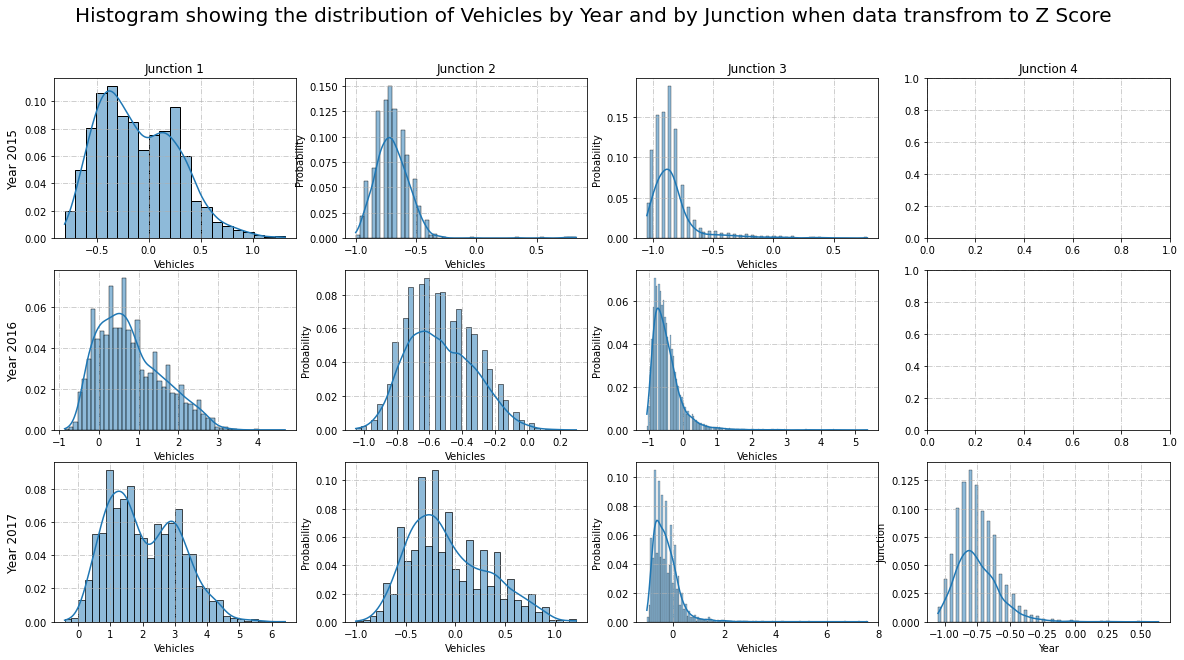

In [28]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.histplot(z_df[(z_df.Junction == junction) & (z_df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
    axis[i, j].grid(True, alpha=0.75, ls='-.')
    
    if i == 0:
        axis[i, j].set_title(f'Junction {junction}', fontsize=12)
    if j == 0:
        axis[i, j].set_ylabel(f'Year {year}', fontsize=12)
        
plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction when data transfrom to Z Score', fontsize=20)
plt.show()

- A box plot helps us visualize the range of the spread of data. It also helps us to identify the outliers.
- Outliers are the unusually high or unusually low points in the dataset which make exception to the general trend of the data.<br>
These outliers, if not removed, may lead to the desired answer becoming wrong.

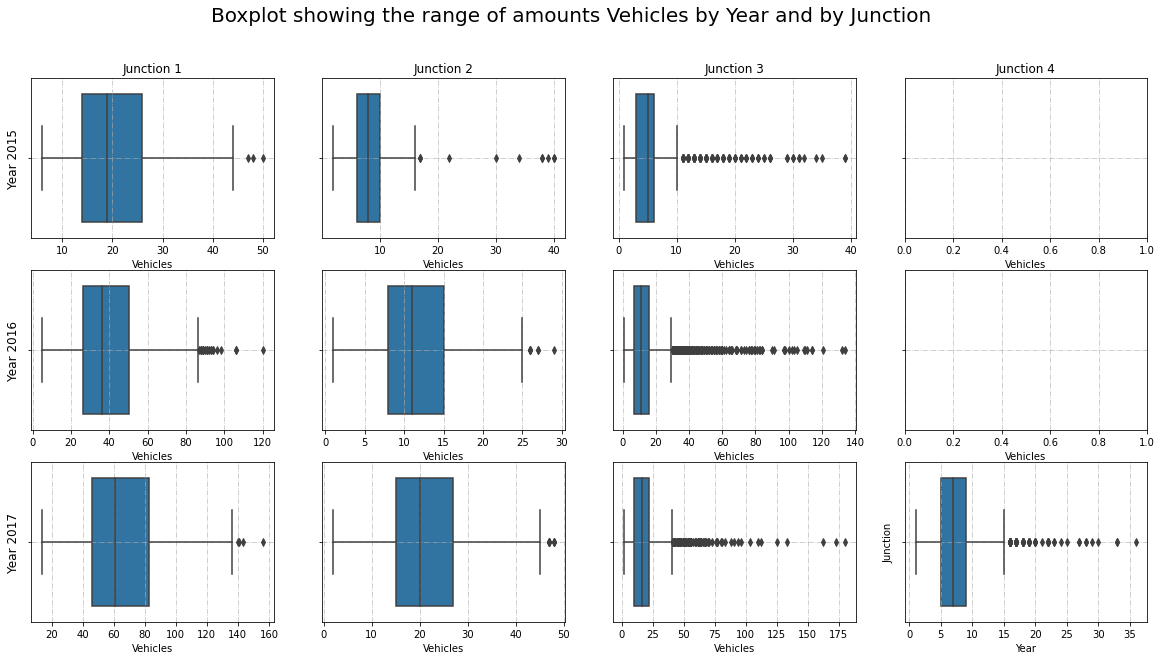

In [29]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in zip(range(3), range(2015, 2018)):
  for j, junction in zip(range(4), range(1, 5)):
    sns.boxplot(x=df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], ax=axis[i, j])
    axis[i, j].grid(True, alpha=0.75, ls='-.')
    
    if i == 0:
        axis[i, j].set_title(f'Junction {junction}', fontsize=12)
    if j == 0:
        axis[i, j].set_ylabel(f'Year {year}', fontsize=12)

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Boxplot showing the range of amounts Vehicles by Year and by Junction', fontsize=20)
plt.show()

- Drop Datetime data <br>
And create a list from the dataframe that has the data in that junction and remove the junction

In [30]:
def get_list_data(dataf, drop=[]):
  for i in drop:
    try:
      dataf.drop(drop, axis=1, inplace=True)
    except:
      print(f"{i} doesn't has in data")
  dataf = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
  return dataf

In [31]:
data = get_list_data(df)
for i in data:
    print(i.head(1))

Empty DataFrame
Columns: [DateTime, Vehicles, Year, Month, Day, Hour]
Index: []
    DateTime  Vehicles  Year  Month  Day  Hour
0 2015-11-01        15  2015     11    1     0
        DateTime  Vehicles  Year  Month  Day  Hour
14592 2015-11-01         6  2015     11    1     0
        DateTime  Vehicles  Year  Month  Day  Hour
29184 2015-11-01         9  2015     11    1     0
        DateTime  Vehicles  Year  Month  Day  Hour
43776 2017-01-01         3  2017      1    1     0


### Correlation
- We use the 'Seaborn' library to create a correlation heatmap.
- Correlation heatmap shows us the degree of correlation of two variables. It ranges from -1 to 1. Where a positive correlation means the values move in the same direction whereas, a negative correlation means the values move in opposite directions. A zero correlation indicates that the two variables do not have a linear relationship with each other.
- When building a regression model, we want to choose independent variables that are strongly correlated with the target variable, as these variables will have a greater impact on the outcome. If two independent variables are highly correlated with each other, then they may provide redundant information to the model, which can lead to overfitting and unreliable results.

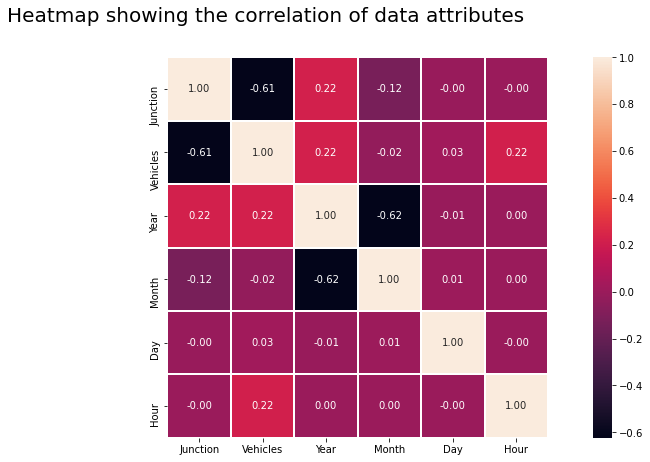

In [32]:
corr = df.corr()
f, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True, linewidths=1)
f.suptitle('Heatmap showing the correlation of data attributes', fontsize=20)
plt.show()

- This list data is then used to plot Autocorrelation and Partial autocorrelation plots using the plot_acf and plot_pacf classes from the statsmodels library.

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [34]:
def make_autocorrelation(junction=1):
    f, ax = plt.subplots(figsize=(17, 6), nrows=2)
    plot_acf(data[junction].Vehicles, title=f"Autocorrelation of amounts of Vehicles in Junction {junction}", ax=ax[0])
    plot_pacf(data[junction].Vehicles, title=f"Partial Autocorrelation of amounts of Vehicles Junction {junction}", ax=ax[1])
    plt.show()

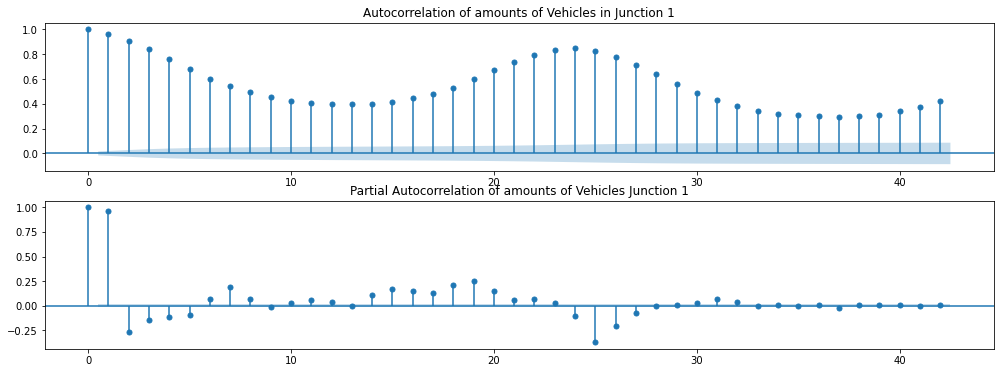

In [35]:
make_autocorrelation(1)

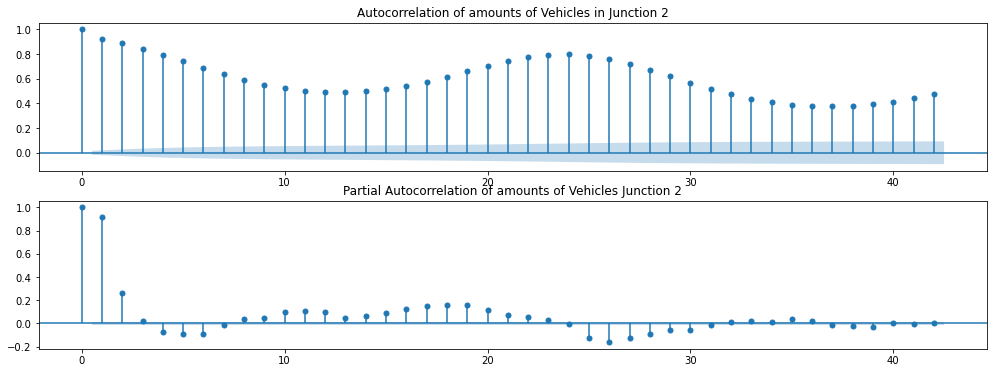

In [36]:
make_autocorrelation(2)

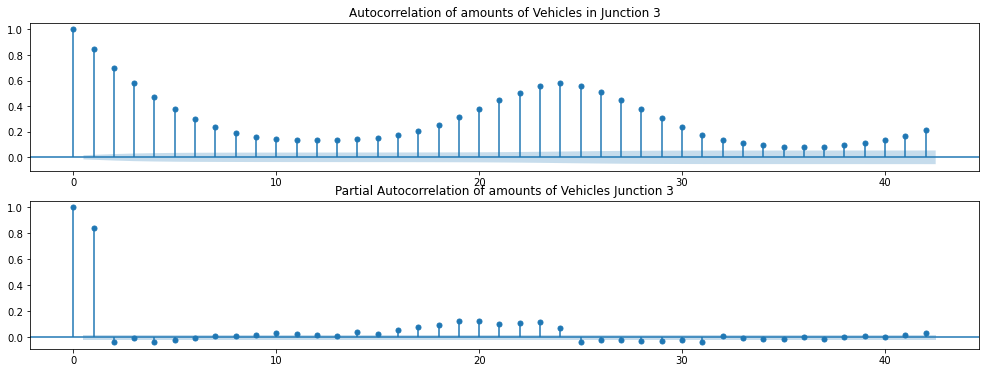

In [37]:
make_autocorrelation(3)

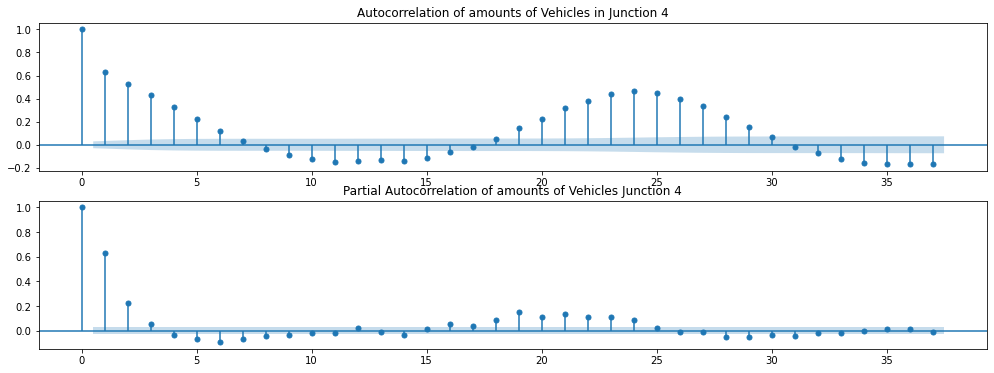

In [38]:
make_autocorrelation(4)

### Modelling
- Since we are done with visualizing of the data, we start with the modelling.

- Correlation between number of vehicles and year is the same as the correlation between number of vehicles and hour.<br>
Taking this into account, we drop the year column to avoid overfitting.

First, we separate the target and independent variables.

In [39]:
j1 = df.Junction == 1
j2 = df.Junction == 2
j3 = df.Junction == 3
j4 = df.Junction == 4

In [40]:
dj1 = df[j1]
dj2 = df[j2]
dj3 = df[j3]
dj4 = df[j4]

In [41]:
data_x1 = dj1.drop(['Vehicles', "DateTime"], axis=1)
data_y1 = dj1['Vehicles']
data_x2 = dj2.drop(['Vehicles', "DateTime"], axis=1)
data_y2 = dj2['Vehicles']
data_x3 = dj3.drop(['Vehicles', "DateTime"], axis=1)
data_y3 = dj3['Vehicles']
data_x4 = dj4.drop(['Vehicles', "DateTime"], axis=1)
data_y4 = dj4['Vehicles']

We import the train_test_split module from Scikit learn's model selection for splitting training and testing data.

In [42]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(data_x1, data_y1, train_size=0.8, random_state=52)
train_x2, test_x2, train_y2, test_y2 = train_test_split(data_x2, data_y2, train_size=0.8, random_state=52)
train_x3, test_x3, train_y3, test_y3 = train_test_split(data_x3, data_y3, train_size=0.8, random_state=52)
train_x4, test_x4, train_y4, test_y4 = train_test_split(data_x4, data_y4, train_size=0.8, random_state=52)

In [43]:
dtr1 = DecisionTreeRegressor(random_state=18).fit(train_x1, train_y1)
prd1 = dtr1.predict(test_x1)
dtmse1 = mean_squared_error(test_y1, prd1)
dtrmse1 = dtmse1**.5
print(dtmse1)
print(dtrmse1)
print("R_squared score:", r2_score(test_y1, prd1))

54.12846865364851
7.357205220302647
R_squared score: 0.9026620018681352


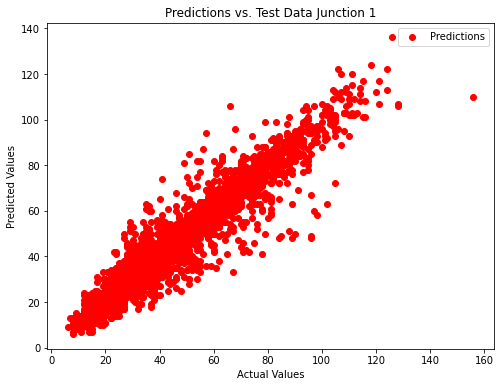

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y1, prd1, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 1')
plt.legend()
plt.show()

In [45]:
dtr2 = DecisionTreeRegressor(random_state=18).fit(train_x2, train_y2)
prd2 = dtr2.predict(test_x2)
dtmse2 = mean_squared_error(test_y2, prd2)
dtrmse2 = dtmse2**.5
print(dtmse2)
print(dtrmse2)
print("R_squared score:", r2_score(test_y2, prd2))

13.69475847893114
3.7006429818250695
R_squared score: 0.7600721035740174


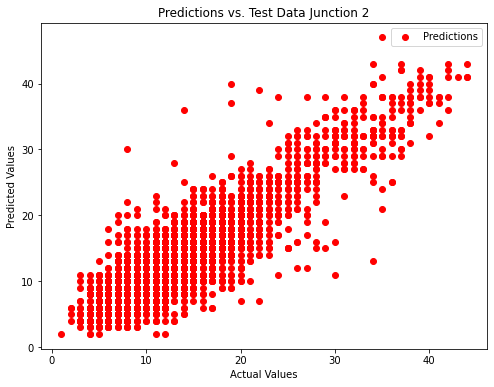

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y2, prd2, color='Red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 2')
plt.legend()
plt.show()

In [47]:
dtr3 = DecisionTreeRegressor(random_state=18).fit(train_x3, train_y3)
prd3 = dtr3.predict(test_x3)
dtmse3 = mean_squared_error(test_y3, prd3)
dtrmse3 = dtmse3**.5
print(dtmse3)
print(dtrmse3)
print("R_squared score:", r2_score(test_y3, prd3))

36.523124357656734
6.043436469233108
R_squared score: 0.6326603379989164


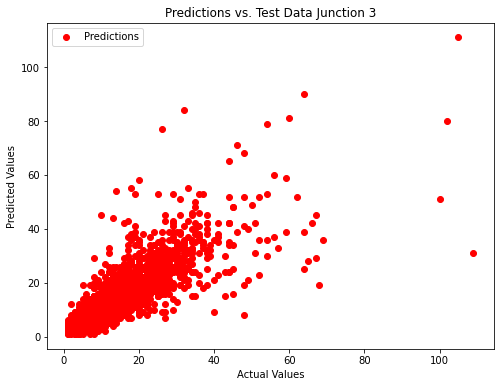

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y3, prd3, cmap='white', color='Red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 3')
plt.legend()
plt.show()

In [49]:
dtr4 = DecisionTreeRegressor(random_state=18).fit(train_x4, train_y4)
prd4 = dtr4.predict(test_x4)
dtmse4 = mean_squared_error(test_y4, prd4)
dtrmse4 = dtmse4**.5
print(dtmse4)
print(dtrmse4)
print("R_squared score:", r2_score(test_y4, prd4))

9.705408515535098
3.115350464319399
R_squared score: 0.19213063391956442


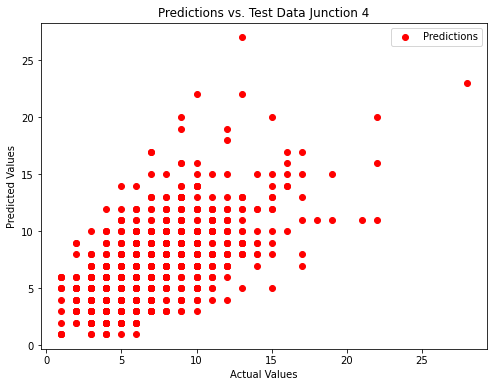

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y4, prd4, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 4')
plt.legend()
plt.show()

In [51]:
rf1 = RandomForestRegressor(n_estimators=300, random_state=19).fit(train_x1, train_y1)
rf2 = RandomForestRegressor(n_estimators=300, random_state=19).fit(train_x2, train_y2)
rf3 = RandomForestRegressor(n_estimators=300, random_state=19).fit(train_x3, train_y3)
rf4 = RandomForestRegressor(n_estimators=300, random_state=19).fit(train_x4, train_y4)

In [52]:
prediction1 = rf1.predict(test_x1)
mse1 = mean_squared_error(test_y1, prediction1)
rmse1 = mse1**.5
print(mse1)
print(rmse1)
print("R_squared score:", r2_score(test_y1, prediction1))

30.206454425031403
5.496039885684183
R_squared score: 0.9456804177630143


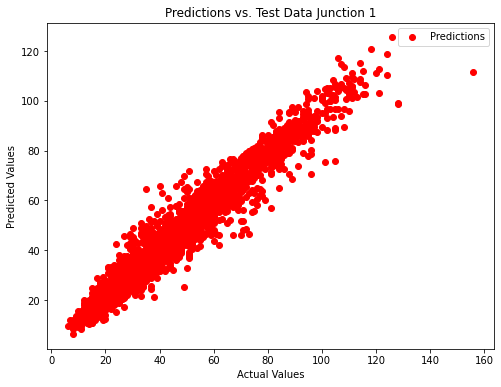

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y1, prediction1, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 1')
plt.legend()
plt.show()

In [54]:
prediction2 = rf2.predict(test_x2)
mse2 = mean_squared_error(test_y2, prediction2)
rmse2 = mse2**.5
print(mse2)
print(rmse2)
print("R_squared score:", r2_score(test_y2, prediction2))

7.765189650184614
2.7866089876738385
R_squared score: 0.8639562997051835


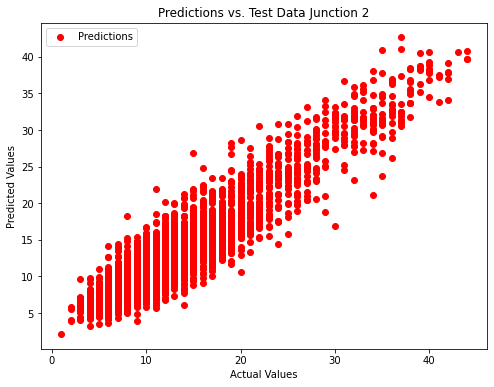

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y2, prediction2, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 2')
plt.legend()
plt.show()

In [56]:
prediction3 = rf3.predict(test_x3)
mse3 = mean_squared_error(test_y3, prediction3)
rmse3 = mse3**.5
print(mse3)
print(rmse3)
print("R_squared score:", r2_score(test_y3, prediction3))

24.369938186593583
4.9365917581458545
R_squared score: 0.7548937826680242


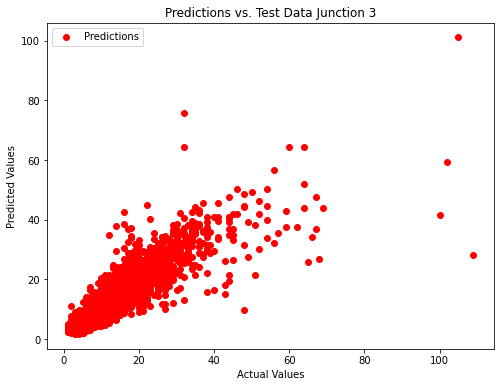

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y3, prediction3, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 3')
plt.legend()
plt.show()

In [58]:
prediction4 = rf4.predict(test_x4)
mse4 = mean_squared_error(test_y4, prediction4)
rmse4 = mse4**.5
print(mse4)
print(rmse4)
print("R_squared score:", r2_score(test_y4, prediction4))

6.351230456463367
2.5201647677212233
R_squared score: 0.47132936089389066


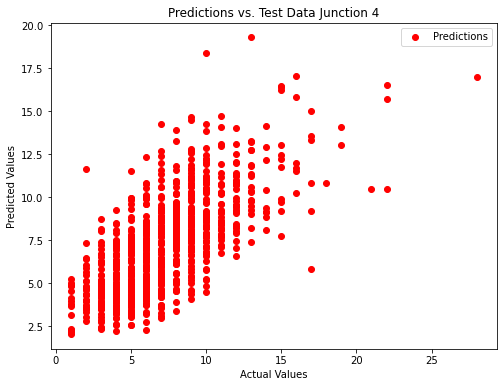

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y4, prediction4, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 4')
plt.legend()
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
## Define Grid 
grid1 = { 
    'n_estimators': [200,300,400,500],
    'random_state' : [18]
}
## show start time
print(datetime.now())
## Grid Search function
CV_rfr1 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid1, cv= 5)
CV_rfr1.fit(train_x1, train_y1)
## show end time
print(datetime.now())

2023-05-31 22:24:12.976641
2023-05-31 22:25:18.094366


In [62]:
print(CV_rfr1.best_params_)

{'n_estimators': 300, 'random_state': 18}


In [63]:
# Create and train model
orf1 = RandomForestRegressor(n_estimators = 400, random_state = 18)
orf1.fit(train_x1, train_y1)
# Predict on test data
oprediction1 = orf1.predict(test_x1)
# Compute mean squared error
omse1 = mean_squared_error(test_y1, oprediction1)
ormse1 = np.sqrt(omse1)
# Print results
print(omse1)
print(ormse1)
print("R_squared score:", r2_score(test_y1, oprediction1))

30.51555168722165
5.524088312764528
R_squared score: 0.945124575163399


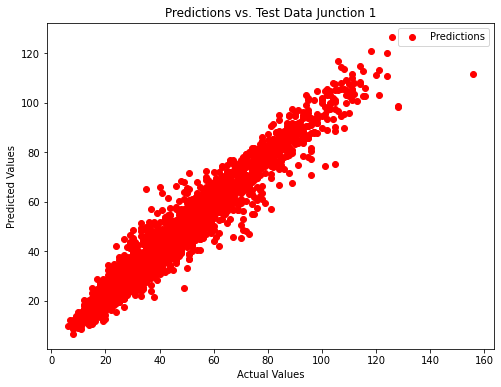

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y1, oprediction1, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 1')
plt.legend()
plt.show()

In [65]:
## Define Grid 
grid2 = { 
    'n_estimators': [200,300,400,500],
    'random_state' : [18]
}
## show start time
print(datetime.now())
## Grid Search function
CV_rfr2 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid2, cv= 5)
CV_rfr2.fit(train_x2, train_y2)
## show end time
print(datetime.now())

2023-05-31 22:25:22.812431
2023-05-31 22:26:30.372636


In [66]:
print(CV_rfr2.best_params_)

{'n_estimators': 500, 'random_state': 18}


In [67]:
# Create and train model
orf2 = RandomForestRegressor(n_estimators = 300, random_state = 18)
orf2.fit(train_x2, train_y2)
# Predict on test data
oprediction2 = orf2.predict(test_x2)
# Compute mean squared error
omse2 = mean_squared_error(test_y2, oprediction2)
ormse2 = np.sqrt(omse2)
# Print results
print(omse2)
print(ormse2)
print("R_squared score:", r2_score(test_y2, oprediction2))

7.804837177876746
2.7937138682901557
R_squared score: 0.8632616873881939


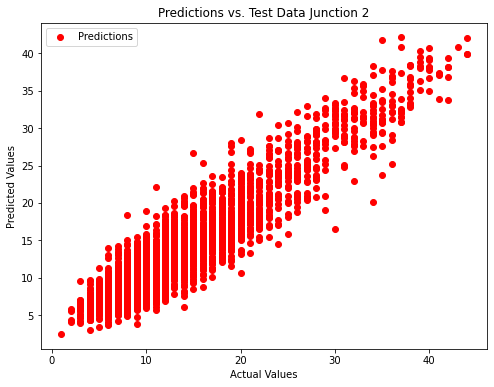

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y2, oprediction2, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 2')
plt.legend()
plt.show()

In [69]:
## Define Grid 
grid3 = { 
    'n_estimators': [200,300,400,500],
    'random_state' : [18]
}
## show start time
print(datetime.now())
## Grid Search function
CV_rfr3 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid3, cv= 5)
CV_rfr3.fit(train_x3, train_y3)
## show end time
print(datetime.now())

2023-05-31 22:26:33.827815
2023-05-31 22:27:41.624233


In [70]:
print(CV_rfr3.best_params_)

{'n_estimators': 500, 'random_state': 18}


In [71]:
# Create and train model
orf3 = RandomForestRegressor(n_estimators = 500, random_state = 18)
orf3.fit(train_x3, train_y3)
# Predict on test data
oprediction3 = orf3.predict(test_x3)
# Compute mean squared error
omse3 = mean_squared_error(test_y3, oprediction3)
ormse3 = np.sqrt(omse3)
# Print results
print(omse3)
print(ormse3)
print("R_squared score:", r2_score(test_y3, oprediction3))

24.29392776293251
4.928887071432303
R_squared score: 0.7556582748583087


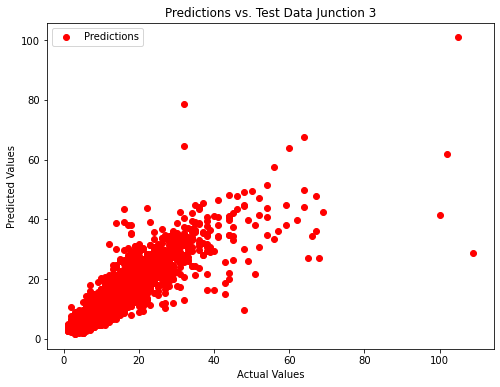

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y3, oprediction3, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 3')
plt.legend()
plt.show()

In [73]:
grid4 = { 
    'n_estimators': [200,300,400,500],
    'random_state' : [18]
}
print(datetime.now())
CV_rfr4 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid4, cv= 5)
CV_rfr4.fit(train_x4, train_y4)
print(datetime.now())

2023-05-31 22:27:47.326701
2023-05-31 22:28:08.018369


In [74]:
print(CV_rfr4.best_params_)

{'n_estimators': 500, 'random_state': 18}


In [75]:
orf4 = RandomForestRegressor(n_estimators = 400, random_state = 18)
orf4.fit(train_x4, train_y4)
oprediction4 = orf4.predict(test_x4)
omse4 = mean_squared_error(test_y4, oprediction4)
ormse4 = np.sqrt(omse4)
print(omse4)
print(ormse4)
print("R_squared score:", r2_score(test_y4, oprediction4))

6.315316577963176
2.5130293627339846
R_squared score: 0.4743187994333399


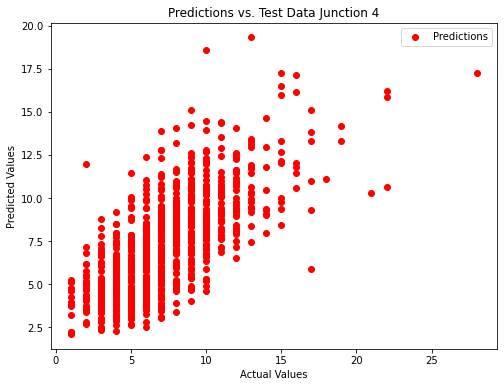

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y4, oprediction4, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 4')
plt.legend()
plt.show()

In [77]:
knn1 = KNeighborsRegressor(n_neighbors=10).fit(train_x1, train_y1)
knn2 = KNeighborsRegressor(n_neighbors=10).fit(train_x2, train_y2)
knn3 = KNeighborsRegressor(n_neighbors=10).fit(train_x3, train_y3)
knn4 = KNeighborsRegressor(n_neighbors=10).fit(train_x4, train_y4)

In [78]:
pd1 = knn1.predict(test_x1)
mse1 = mean_squared_error(test_y1, pd1)
rmse1 = mse1**.5
print(mse1)
print(rmse1)
print("R_squared score:", r2_score(test_y1, pd1))

193.24487838300786
13.901254561477819
R_squared score: 0.6524921159067414


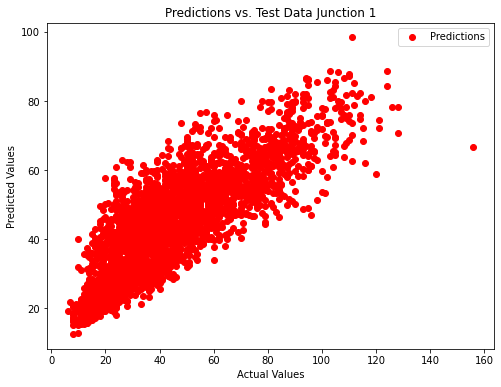

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y1, pd1, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 1')
plt.legend()
plt.show()

In [80]:
pd2 = knn2.predict(test_x2)
mse2 = mean_squared_error(test_y2, pd2)
rmse2 = mse2**.5
print(mse2)
print(rmse2)
print("R_squared score:", r2_score(test_y2, pd2))

21.825912983898593
4.671821163518419
R_squared score: 0.6176168131873442


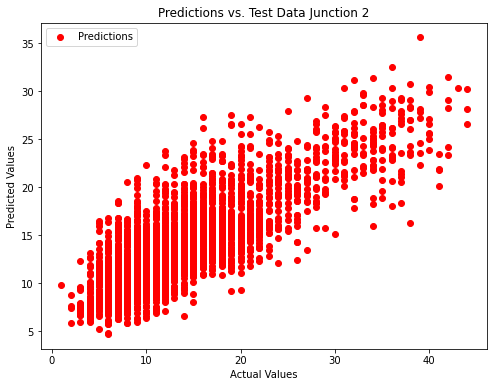

In [81]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y2, pd2, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 2')
plt.legend()
plt.show()

In [82]:
pd3 = knn3.predict(test_x3)
mse3 = mean_squared_error(test_y3, pd3)
rmse3 = mse3**.5
print(mse3)
print(rmse3)
print("R_squared score:", r2_score(test_y3, pd3))

51.788163754710524
7.19639936042397
R_squared score: 0.4791287190269098


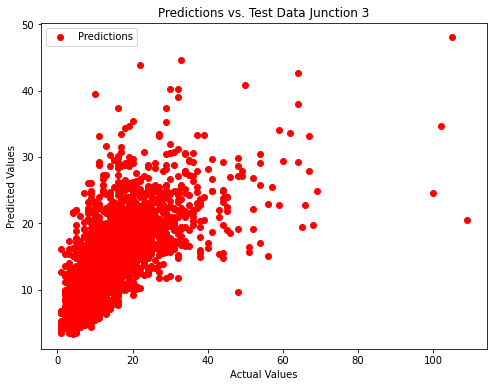

In [83]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y3, pd3, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 3')
plt.legend()
plt.show()

In [84]:
pd4 = knn4.predict(test_x4)
mse4 = mean_squared_error(test_y4, pd4)
rmse4 = mse4**.5
print(mse4)
print(rmse4)
print("R_squared score:", r2_score(test_y4, pd4))

6.654833141542004
2.579696327388556
R_squared score: 0.44605774988007296


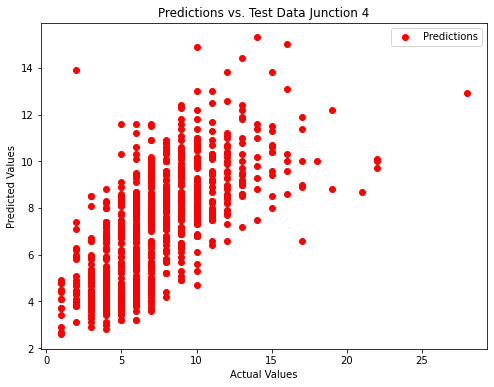

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y4, pd4, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 4')
plt.legend()
plt.show()

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(train_x4)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    score = cross_val_score(knn, X, train_y4, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

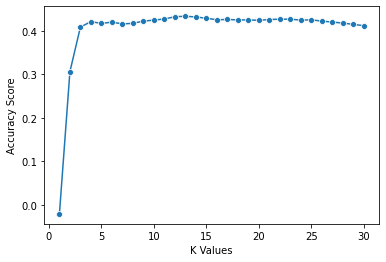

In [88]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [89]:
knn1 = KNeighborsRegressor(n_neighbors=11).fit(train_x1, train_y1)
knn2 = KNeighborsRegressor(n_neighbors=11).fit(train_x2, train_y2)
knn3 = KNeighborsRegressor(n_neighbors=11).fit(train_x3, train_y3)
knn4 = KNeighborsRegressor(n_neighbors=11).fit(train_x4, train_y4)

In [90]:
bpd1 = knn1.predict(test_x1)
mse1 = mean_squared_error(test_y1, bpd1)
rmse1 = mse1**.5
print(mse1)
print(rmse1)
print("R_squared score:", r2_score(test_y1, bpd1))

200.37294556326603
14.155315099398742
R_squared score: 0.6396738742839201


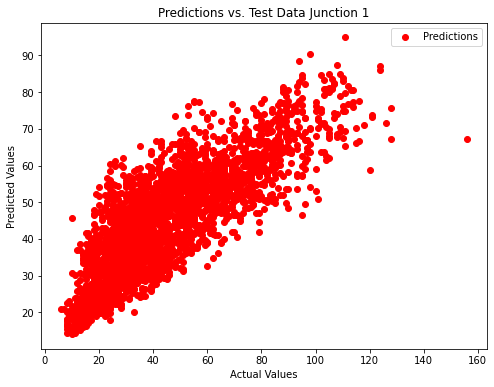

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y1, bpd1, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 1')
plt.legend()
plt.show()

In [92]:
bpd2 = knn2.predict(test_x2)
mse2 = mean_squared_error(test_y2, bpd2)
rmse2 = mse2**.5
print(mse2)
print(rmse2)
print("R_squared score:", r2_score(test_y2, bpd2))

22.43738515680962
4.736811707975061
R_squared score: 0.6069040114686959


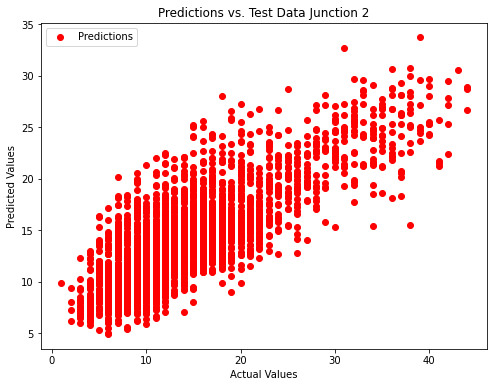

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y2, bpd2, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 2')
plt.legend()
plt.show()

In [94]:
bpd3 = knn3.predict(test_x3)
mse3 = mean_squared_error(test_y3, bpd3)
rmse3 = mse3**.5
print(mse3)
print(rmse3)
print("R_squared score:", r2_score(test_y3, bpd3))

53.08817125756301
7.286162999656473
R_squared score: 0.4660535967558713


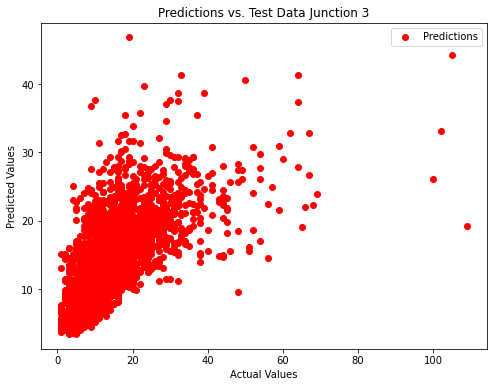

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y3, bpd3, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 3')
plt.legend()
plt.show()

In [96]:
bpd4 = knn4.predict(test_x4)
mse4 = mean_squared_error(test_y4, bpd4)
rmse4 = mse4**.5
print(mse4)
print(rmse4)
print("R_squared score:", r2_score(test_y4, bpd4))

6.669088626615565
2.5824578654095336
R_squared score: 0.4448711362850747


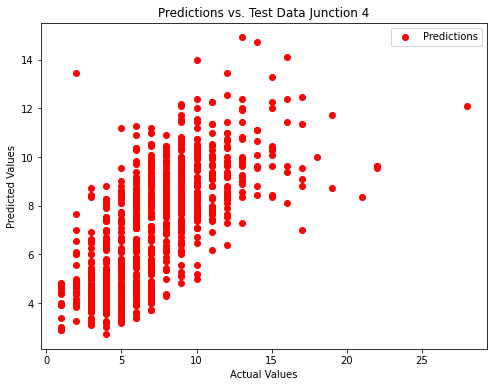

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y4, bpd4, color='red', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Test Data Junction 4')
plt.legend()
plt.show()

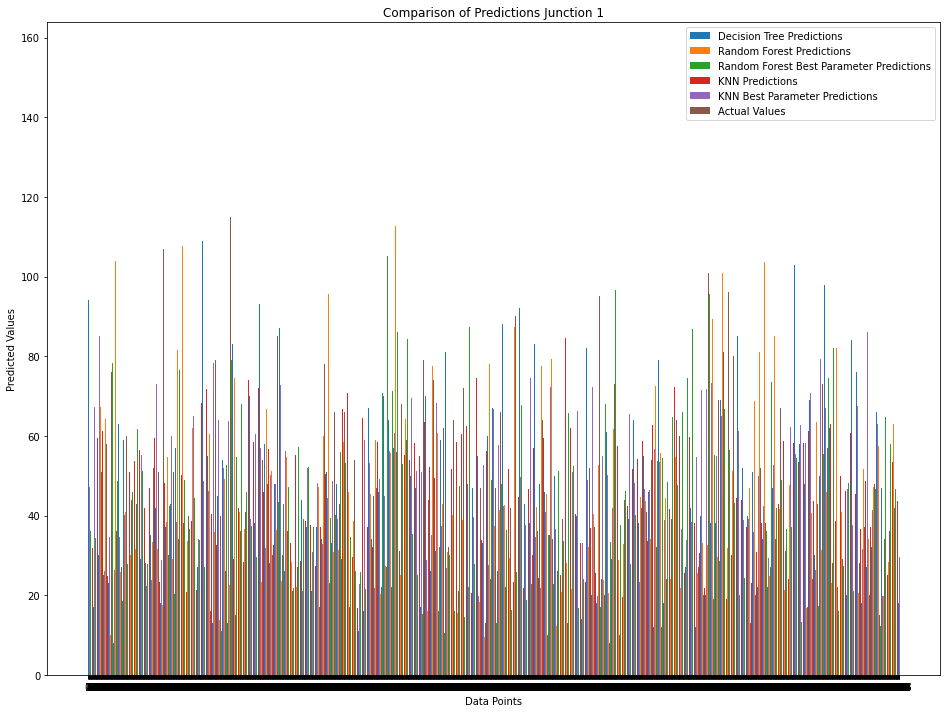

In [98]:
# Create an array of indices for the x-axis
x = np.arange(len(prd1))

# Set the width of the bars
bar_width = 0.15

# Set up the plot
plt.figure(figsize=(16, 12))

# Plot the predictions as bar graphs
plt.bar(x, prd1, width=bar_width, label='Decision Tree Predictions')
plt.bar(x + bar_width, prediction1, width=bar_width, label='Random Forest Predictions')
plt.bar(x + 2 * bar_width, oprediction1, width=bar_width, label='Random Forest Best Parameter Predictions')
plt.bar(x + 3 * bar_width, pd1, width=bar_width, label='KNN Predictions')
plt.bar(x + 4 * bar_width, bpd1, width=bar_width, label='KNN Best Parameter Predictions')
plt.bar(x + 5 * bar_width, test_y1, width=bar_width, label='Actual Values')

# Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions Junction 1')
plt.xticks(x + 2 * bar_width, x)  # Set x-axis labels to data point indices
plt.legend()

# Display the plot
plt.show()

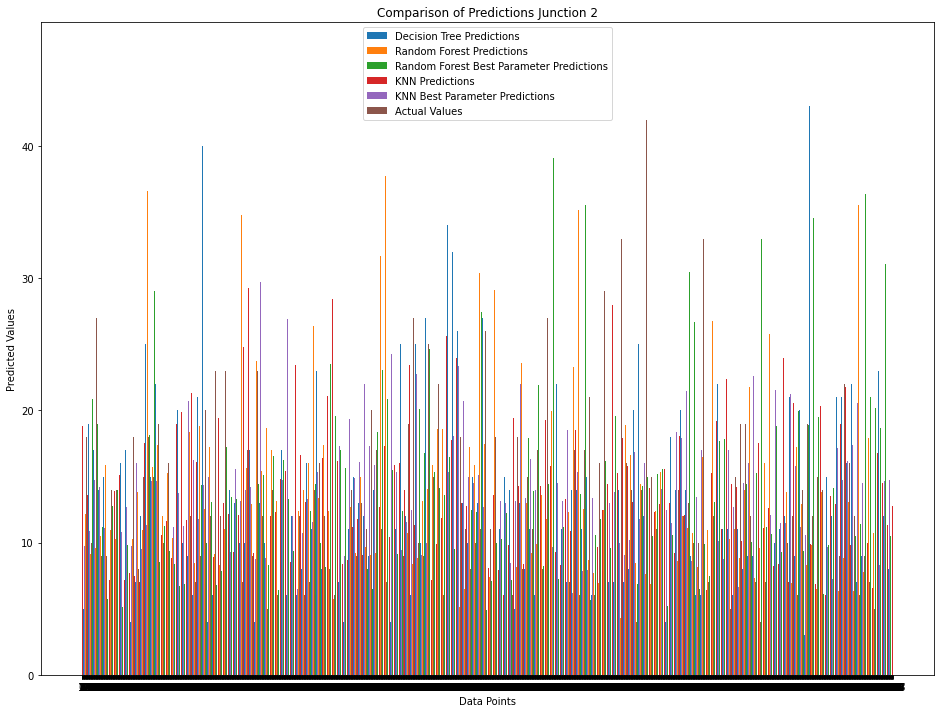

In [99]:
# Create an array of indices for the x-axis
x = np.arange(len(prd2))

# Set the width of the bars
bar_width = 0.15

# Set up the plot
plt.figure(figsize=(16, 12))

# Plot the predictions as bar graphs
plt.bar(x, prd2, width=bar_width, label='Decision Tree Predictions')
plt.bar(x + bar_width, prediction2, width=bar_width, label='Random Forest Predictions')
plt.bar(x + 2 * bar_width, oprediction2, width=bar_width, label='Random Forest Best Parameter Predictions')
plt.bar(x + 3 * bar_width, pd2, width=bar_width, label='KNN Predictions')
plt.bar(x + 4 * bar_width, bpd2, width=bar_width, label='KNN Best Parameter Predictions')
plt.bar(x + 5 * bar_width, test_y2, width=bar_width, label='Actual Values')

# Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions Junction 2')
plt.xticks(x + 2 * bar_width, x)  # Set x-axis labels to data point indices
plt.legend()

# Display the plot
plt.show()

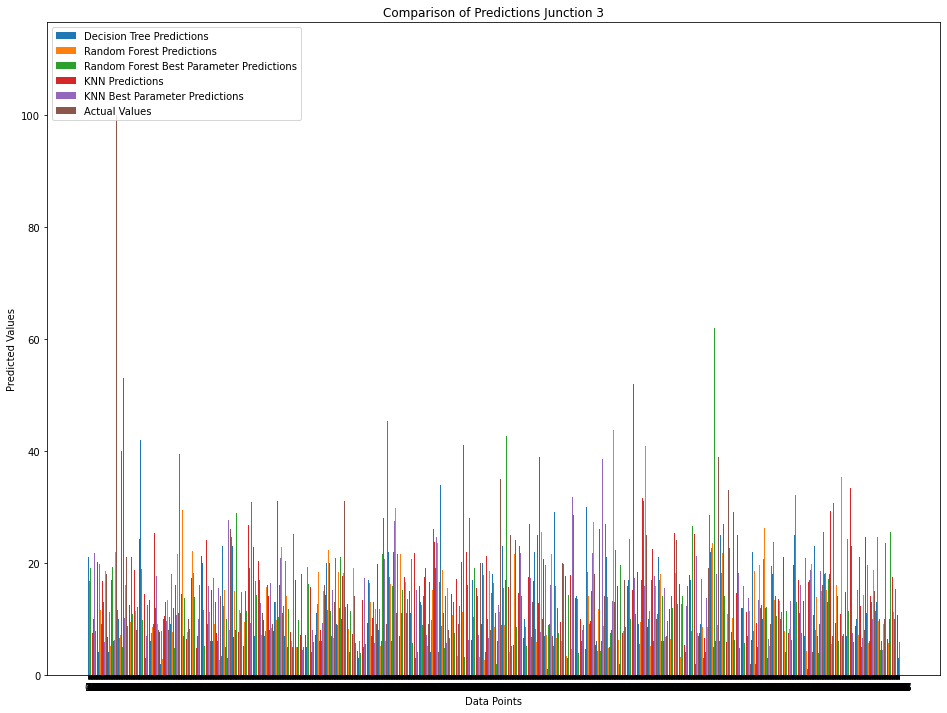

In [100]:
# Create an array of indices for the x-axis
x = np.arange(len(prd3))

# Set the width of the bars
bar_width = 0.15

# Set up the plot
plt.figure(figsize=(16, 12))

# Plot the predictions as bar graphs
plt.bar(x, prd3, width=bar_width, label='Decision Tree Predictions')
plt.bar(x + bar_width, prediction3, width=bar_width, label='Random Forest Predictions')
plt.bar(x + 2 * bar_width, oprediction3, width=bar_width, label='Random Forest Best Parameter Predictions')
plt.bar(x + 3 * bar_width, pd3, width=bar_width, label='KNN Predictions')
plt.bar(x + 4 * bar_width, bpd3, width=bar_width, label='KNN Best Parameter Predictions')
plt.bar(x + 5 * bar_width, test_y3, width=bar_width, label='Actual Values')

# Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions Junction 3')
plt.xticks(x + 2 * bar_width, x)  # Set x-axis labels to data point indices
plt.legend()

# Display the plot
plt.show()

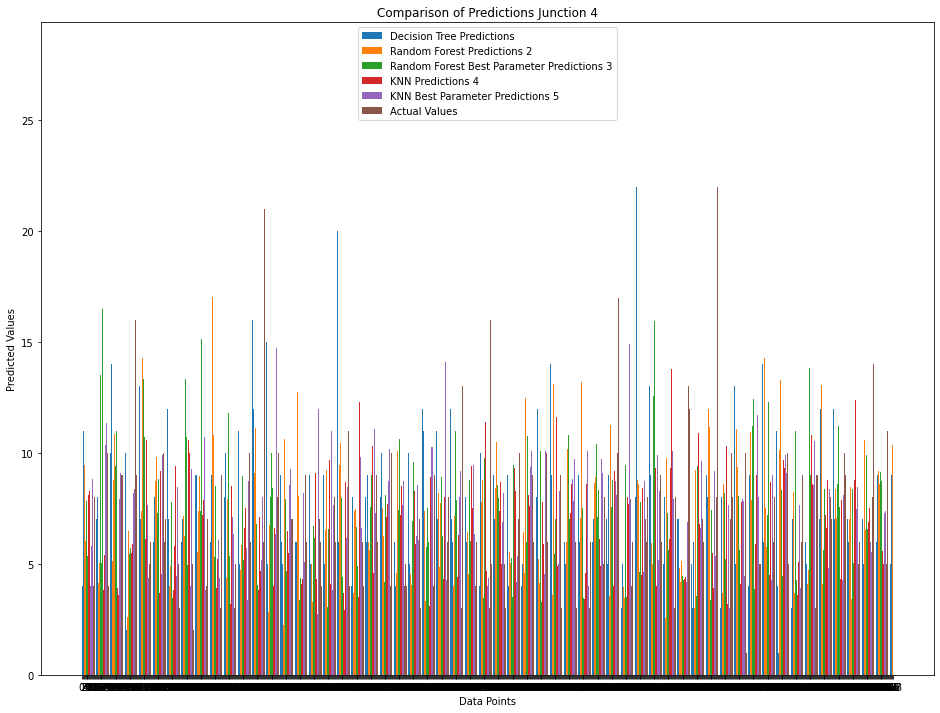

In [101]:
# Create an array of indices for the x-axis
x = np.arange(len(prd4))

# Set the width of the bars
bar_width = 0.15

# Set up the plot
plt.figure(figsize=(16, 12))

# Plot the predictions as bar graphs
plt.bar(x, prd4, width=bar_width, label='Decision Tree Predictions')
plt.bar(x + bar_width, prediction4, width=bar_width, label='Random Forest Predictions 2')
plt.bar(x + 2 * bar_width, oprediction4, width=bar_width, label='Random Forest Best Parameter Predictions 3')
plt.bar(x + 3 * bar_width, pd4, width=bar_width, label='KNN Predictions 4')
plt.bar(x + 4 * bar_width, bpd4, width=bar_width, label='KNN Best Parameter Predictions 5')
plt.bar(x + 5 * bar_width, test_y4, width=bar_width, label='Actual Values')

# Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions Junction 4')
plt.xticks(x + 2 * bar_width, x)  # Set x-axis labels to data point indices
plt.legend()

# Display the plot
plt.show()